# SHAP Explanations for data and text Classification



## Read and prepare data

We use the California Housing dataset, which contains the following features:
- MedInc: median income in the block
- HouseAge: average age of houses in the block
- AveRooms: average number of rooms
- AveBedrms: average number of bedrooms
- Population: population in the block
- AveOccup: average number of people in the block
- Latitude: latitude
- Longitude: longitude

The target variable is:
- Median house price in the block (in thousands of dollars)

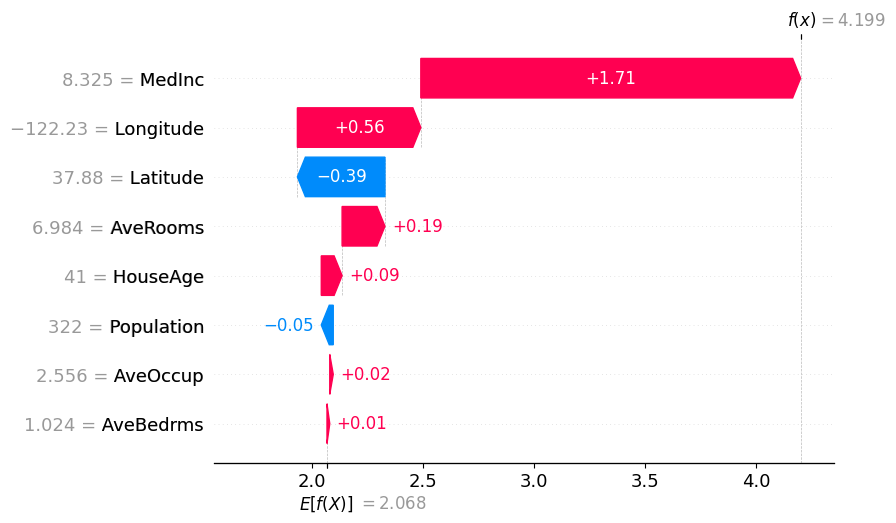

In [6]:
import xgboost
import shap
shap.initjs()
# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [7]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [8]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

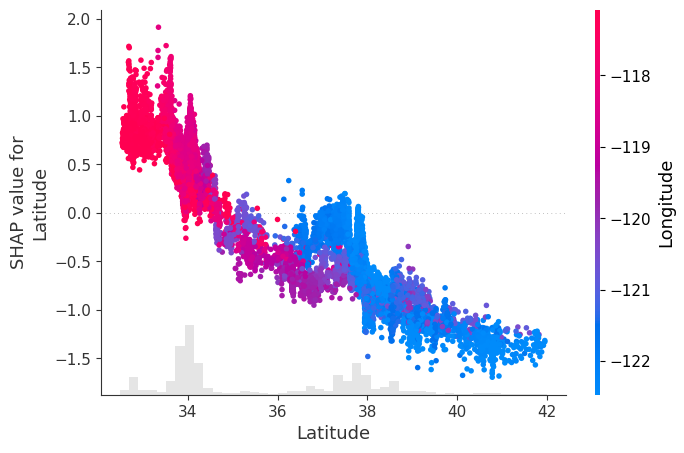

In [9]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

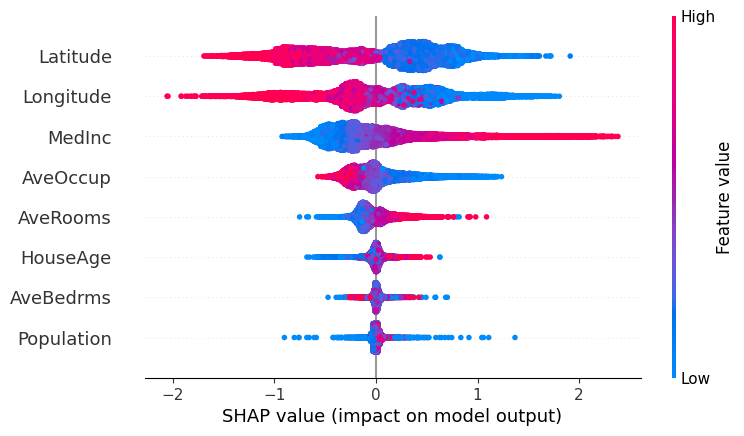

In [10]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)